# Using Logistic Model to Predict the Survival Rate of Passengers on the Titanic

### 林惠玲

## Import CSV Data Using Pandas

In [5]:
# Import the data set
import pandas as pd
url= "https://storage.googleapis.com/py_ds_basic/kaggle_titanic_train.csv"
titanic_train = pd.read_csv(url)

# Check the frame of data set
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Descriptive Statictics
titanic_train.describe()

# In the column of age, null values are existed

/Users/huilingcat/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## The Problem of Null Values

#### In order to fix this problem, we compute the median of age then use it to replace those null values.

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


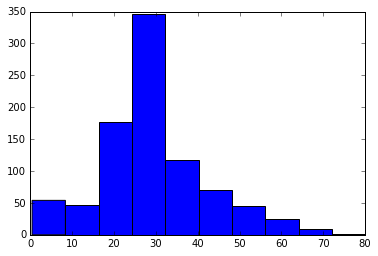

In [88]:
import numpy as np
import matplotlib.pyplot as plt

age_median = np.nanmedian(titanic_train["Age"])
New_Age = np.where(titanic_train["Age"].isnull(), age_median, titanic_train["Age"])
titanic_train["Age"] = New_Age
print(titanic_train.describe())

%matplotlib inline
plt.hist(titanic_train["Age"])
plt.show()


## Dummy Variables



In [108]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
encoded_Sex = label_encoder.fit_transform(titanic_train['Sex'])
encoded_Pclass = label_encoder.fit_transform(titanic_train["Pclass"])
Fare = titanic_train["Fare"]


## X and y

$$y_{i} = X^{T}_{i}\omega$$

In [109]:
titanic_X = pd.DataFrame([encoded_Sex,
                          encoded_Pclass,
                          Fare,
                          New_Age,
                          encoded_Sex * encoded_Pclass,
                          Fare * New_Age
                          ]).T
titanic_y = titanic_train["Survived"]

## Training Set and Testing Set
#### Training: 80% ; Testing: 20%

In [142]:
from sklearn.cross_validation import train_test_split

# training and test
train_X, test_X, train_y, test_y = train_test_split(titanic_X, titanic_y, test_size=0.2)

## Logistic Regression
#### We use Sex, Pclass, Age, Fare, Sex`*`Pclass and Fare`*`Age as Parameters

Age to be the parameters

In [147]:
from sklearn import metrics, linear_model

# model
logistic_regr = linear_model.LogisticRegression()
logistic_regr.fit(train_X, train_y)

# predict
test_y_predicted = logistic_regr.predict(test_X)

# accuracy
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.843575418994


In [150]:
url = "https://storage.googleapis.com/py_ds_basic/kaggle_titanic_train.csv"
to_submit = pd.read_csv(url)

encodered_Sex_to_submit = label_encoder.fit_transform(to_submit["Sex"])
encodered_Pclass_to_submit = label_encoder.fit_transform(to_submit["Pclass"])
Fare_to_submit = to_submit["Fare"]
age_median = np.nanmedian(to_submit["Age"])
replace_Age = np.where(to_submit["Age"].isnull(), age_median, to_submit["Age"])
to_submit_X = pd.DataFrame([encodered_Sex_to_submit,
                            encodered_Pclass_to_submit,
                            Fare_to_submit,
                            replace_Age,
                            encodered_Sex_to_submit * encodered_Pclass_to_submit,
                            Fare_to_submit * replace_Age
                           ]).T

# predict
to_submit_y = logistic_regr.predict(to_submit_X)
print(to_submit_y)

# prepare for upload file
to_submit_data = {
    "PassengerId": to_submit["PassengerId"],
    "Survived": to_submit_y
}
to_submit_df = pd.DataFrame(to_submit_data)

# transfer to csv
to_submit_df.to_csv("to_submit.csv", index = False)


[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 